In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
from IPython.display import display
from IPython.display import clear_output
import ipywidgets as widgets
from wordcloud import WordCloud
import altair as alt



### Filtre

In [2]:
components = []

type_comm = """
All

"""

algo = """
LDA
CLOUD
"""


topic = """
Sujet 1
Sujet 2
Sujet 3
Sujet 4

"""


comm_label = widgets.Label(value="Types de commentaire :")
comm = widgets.Dropdown(options=type_comm.split("\n"), value="All")
components.extend([comm_label, comm])


algo_label = widgets.Label(value="Représentation texte:")
algo_score = widgets.Dropdown(options=algo.split("\n"), value="CLOUD")
components.extend([algo_label, algo_score])

topic_label = widgets.Label(value="Topic modelling :")
topic_score = widgets.Dropdown(options=topic.split("\n"), value="Sujet 1")
components.extend([topic_label, topic_score])


display(widgets.VBox([comm_label, comm, algo_label, algo_score,
                      topic_label, topic_score]))

Note: Les commentaires de faible rating ont des notes strictement inférieures à 3. Les commentaires ayant un rating élevé ont des notes supérieures ou égales à 3.

# Textes

### COMMENTAIRES

In [3]:
out = widgets.Output()

In [4]:
missing_values = ["na","n/a","--"," "]


data_cloud_all = pd.read_csv("P6_cloud_all.csv",sep=',',
                             na_values=missing_values,
                             low_memory=False)

data_text_all_LDA = pd.read_csv("P6_text_all_LDA.csv",sep=',',
                             na_values=missing_values,
                             low_memory=False)

data_img_clus_3D = pd.read_csv("P6_02_tsne.csv",sep=',',
                             na_values=missing_values,
                             low_memory=False)



fig = go.Figure()

In [5]:
def select_data():
    if (comm.value == "All" and algo_score.value == "CLOUD"):
        selected = data_cloud_all
    if (comm.value == "faible rating" and algo_score.value == "CLOUD"):
        selected = data_cloud_neg
    if (comm.value == "All" and algo_score.value == "LDA"):
        selected = data_text_all_LDA
    if (comm.value == "faible rating" and algo_score.value == "LDA"):
        selected = data_text_neg_LDA        

    return selected


def plot_cloud_all(text, title):
    clear_output()
    wc_neg = WordCloud(background_color="white", max_words=100,
                       contour_width=0.5, 
                       contour_color='red', 
                       max_font_size=500)

    wc_neg.generate(text)

    plt.figure(figsize=(15,10))
    plt.imshow(wc_neg, interpolation=None)
    plt.axis("off")
    plt.savefig('cloud_all.jpg')
    img_width = 850
    img_height = 550
    
    fig.update_xaxes(visible=False,
                     range=[0, img_width])

    fig.update_yaxes(visible=False, range=[0, img_height], 
                     scaleanchor="x")
    fig.update_layout(title=title)

    fig.add_layout_image(dict(x=0, sizex=img_width,
                              y=img_height,
                              sizey=img_height,
                              xref="x",
                              yref="y",
                              opacity=1.0,
                              layer="below",
                              sizing="stretch",
                              source="cloud_all.jpg"))

    fig.update_layout(width=img_width,
                      height=img_height,
                      margin={"l": 0, "r": 0, "t": 0, "b": 0})
    fig.show(config={'doubleClick': 'reset'})



    
   
    
    

def load_data_all_LDA(df):
    if topic_score.value == "Sujet 1":
        plot_words_all_lda(0, df,
                   'Sujets mis en evidence par LDA dans tous les commentaires',
                   'g')
    if topic_score.value == "Sujet 2":
        plot_words_all_lda(1, df,
                   'Sujets mis en evidence par LDA dans tous les commentaires',
                   'g')
    if topic_score.value == "Sujet 3":
        plot_words_all_lda(2, df,
                   'Sujets mis en evidence par LDA dans tous les commentaires',
                   'g')
    if topic_score.value == "Sujet 4":
        plot_words_all_lda(3, df,
                   'Sujets mis en evidence par LDA dans tous les commentaires',
                   'g')
    if topic_score.value == "Sujet 5":
        plot_words_all_lda(4, df,
                   'Sujets mis en evidence par LDA dans tous les commentaires',
                   'g')



def plot_words_all_lda(idx, df, title, color):


    clear_output()
    idx_i = idx * 12
    idx += 1
    idx_f = idx * 12
    df_1 = df.iloc[idx_i:idx_f, :].sort_values(by="weights_all",
                                               ascending=True)
    labels = df_1['features_all']
    wei = df_1['weights_all']
    fig = px.bar(df_1, y="features_all", x="weights_all",
                 orientation='h', title=title, text='weights_all',
                 width=800, height=450, template="simple_white")
    fig.update_xaxes(title_text="Poids des mots")
    fig.update_yaxes(title_text="Mots les plus utilisés")
    margin = go.layout.Margin(l=20, r=20, b=30, t=30)
    fig.update_traces(marker_color='rgb(160, 160, 160)',
                      texttemplate='%{text:.2f}',
                      textposition='outside',
                      marker_line_width=1.5, opacity=0.6)
    fig.update_layout(margin=margin)
    fig.show()




In [6]:
def on_value_change(change):
    with out:
        
        df = select_data()

        if (comm.value == "All" and algo_score.value == "CLOUD"):
            text = df['text_neg'][0]
            plot_cloud_all(str(text),
                          "Mots les plus utilisés dans tous les commentaires")
   
        if (comm.value == "All" and algo_score.value == "LDA"):
            load_data_all_LDA(df)
      

            
comm.observe(on_value_change, names="value")
algo_score.observe(on_value_change, names="value")
topic_score.observe(on_value_change, names="value")

Output()

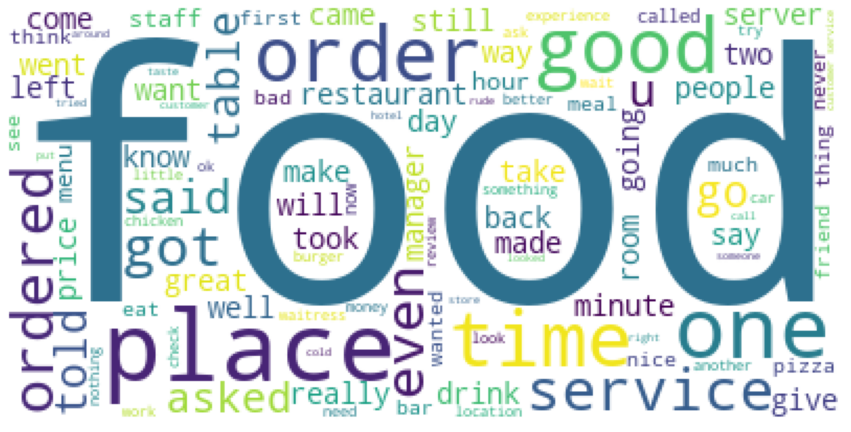

In [7]:
on_value_change(None)
out

Visualisation des mots utilisés dans les commentaires concernant les restaurants de NEW YORK

# T-SNE

# Clustering 3D

###  Réduction de dimensions par t-SNE

In [8]:
clear_output()

fig_2 = px.scatter_3d(data_img_clus_3D,
                 x="0",
                 y="1",
                 z="2")#,
                 #color="red")
fig_2.update_xaxes()
fig_2.update_yaxes()
fig_2.update_layout(title="Projection en 3D des {} images sur le plan factoriel t-SNE"\
                  .format(data_img_clus_3D.shape[0], 1))
margin = go.layout.Margin(l=20, r=20, b=30, t=30)
fig_2.update_layout(margin=margin)
fig_2.show()